In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Cleaned_data_tree.csv')
df.head()

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22.0,0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,...,1,0,0,1,0,0,0,1,0,0
1,21.0,0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,...,0,0,1,0,1,0,0,0,0,1
2,25.0,0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,...,0,0,0,0,0,0,1,0,0,0
3,23.0,0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,...,0,0,0,1,0,0,1,0,0,0
4,24.0,1,66135.0,1,35000.0,14.27,0.53,4.0,586,1,...,1,0,0,1,0,0,1,0,0,0


In [3]:
X = df.drop('loan_status',axis=1)
y=df['loan_status']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Modelling and Evaluation

In [5]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=True)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=True)

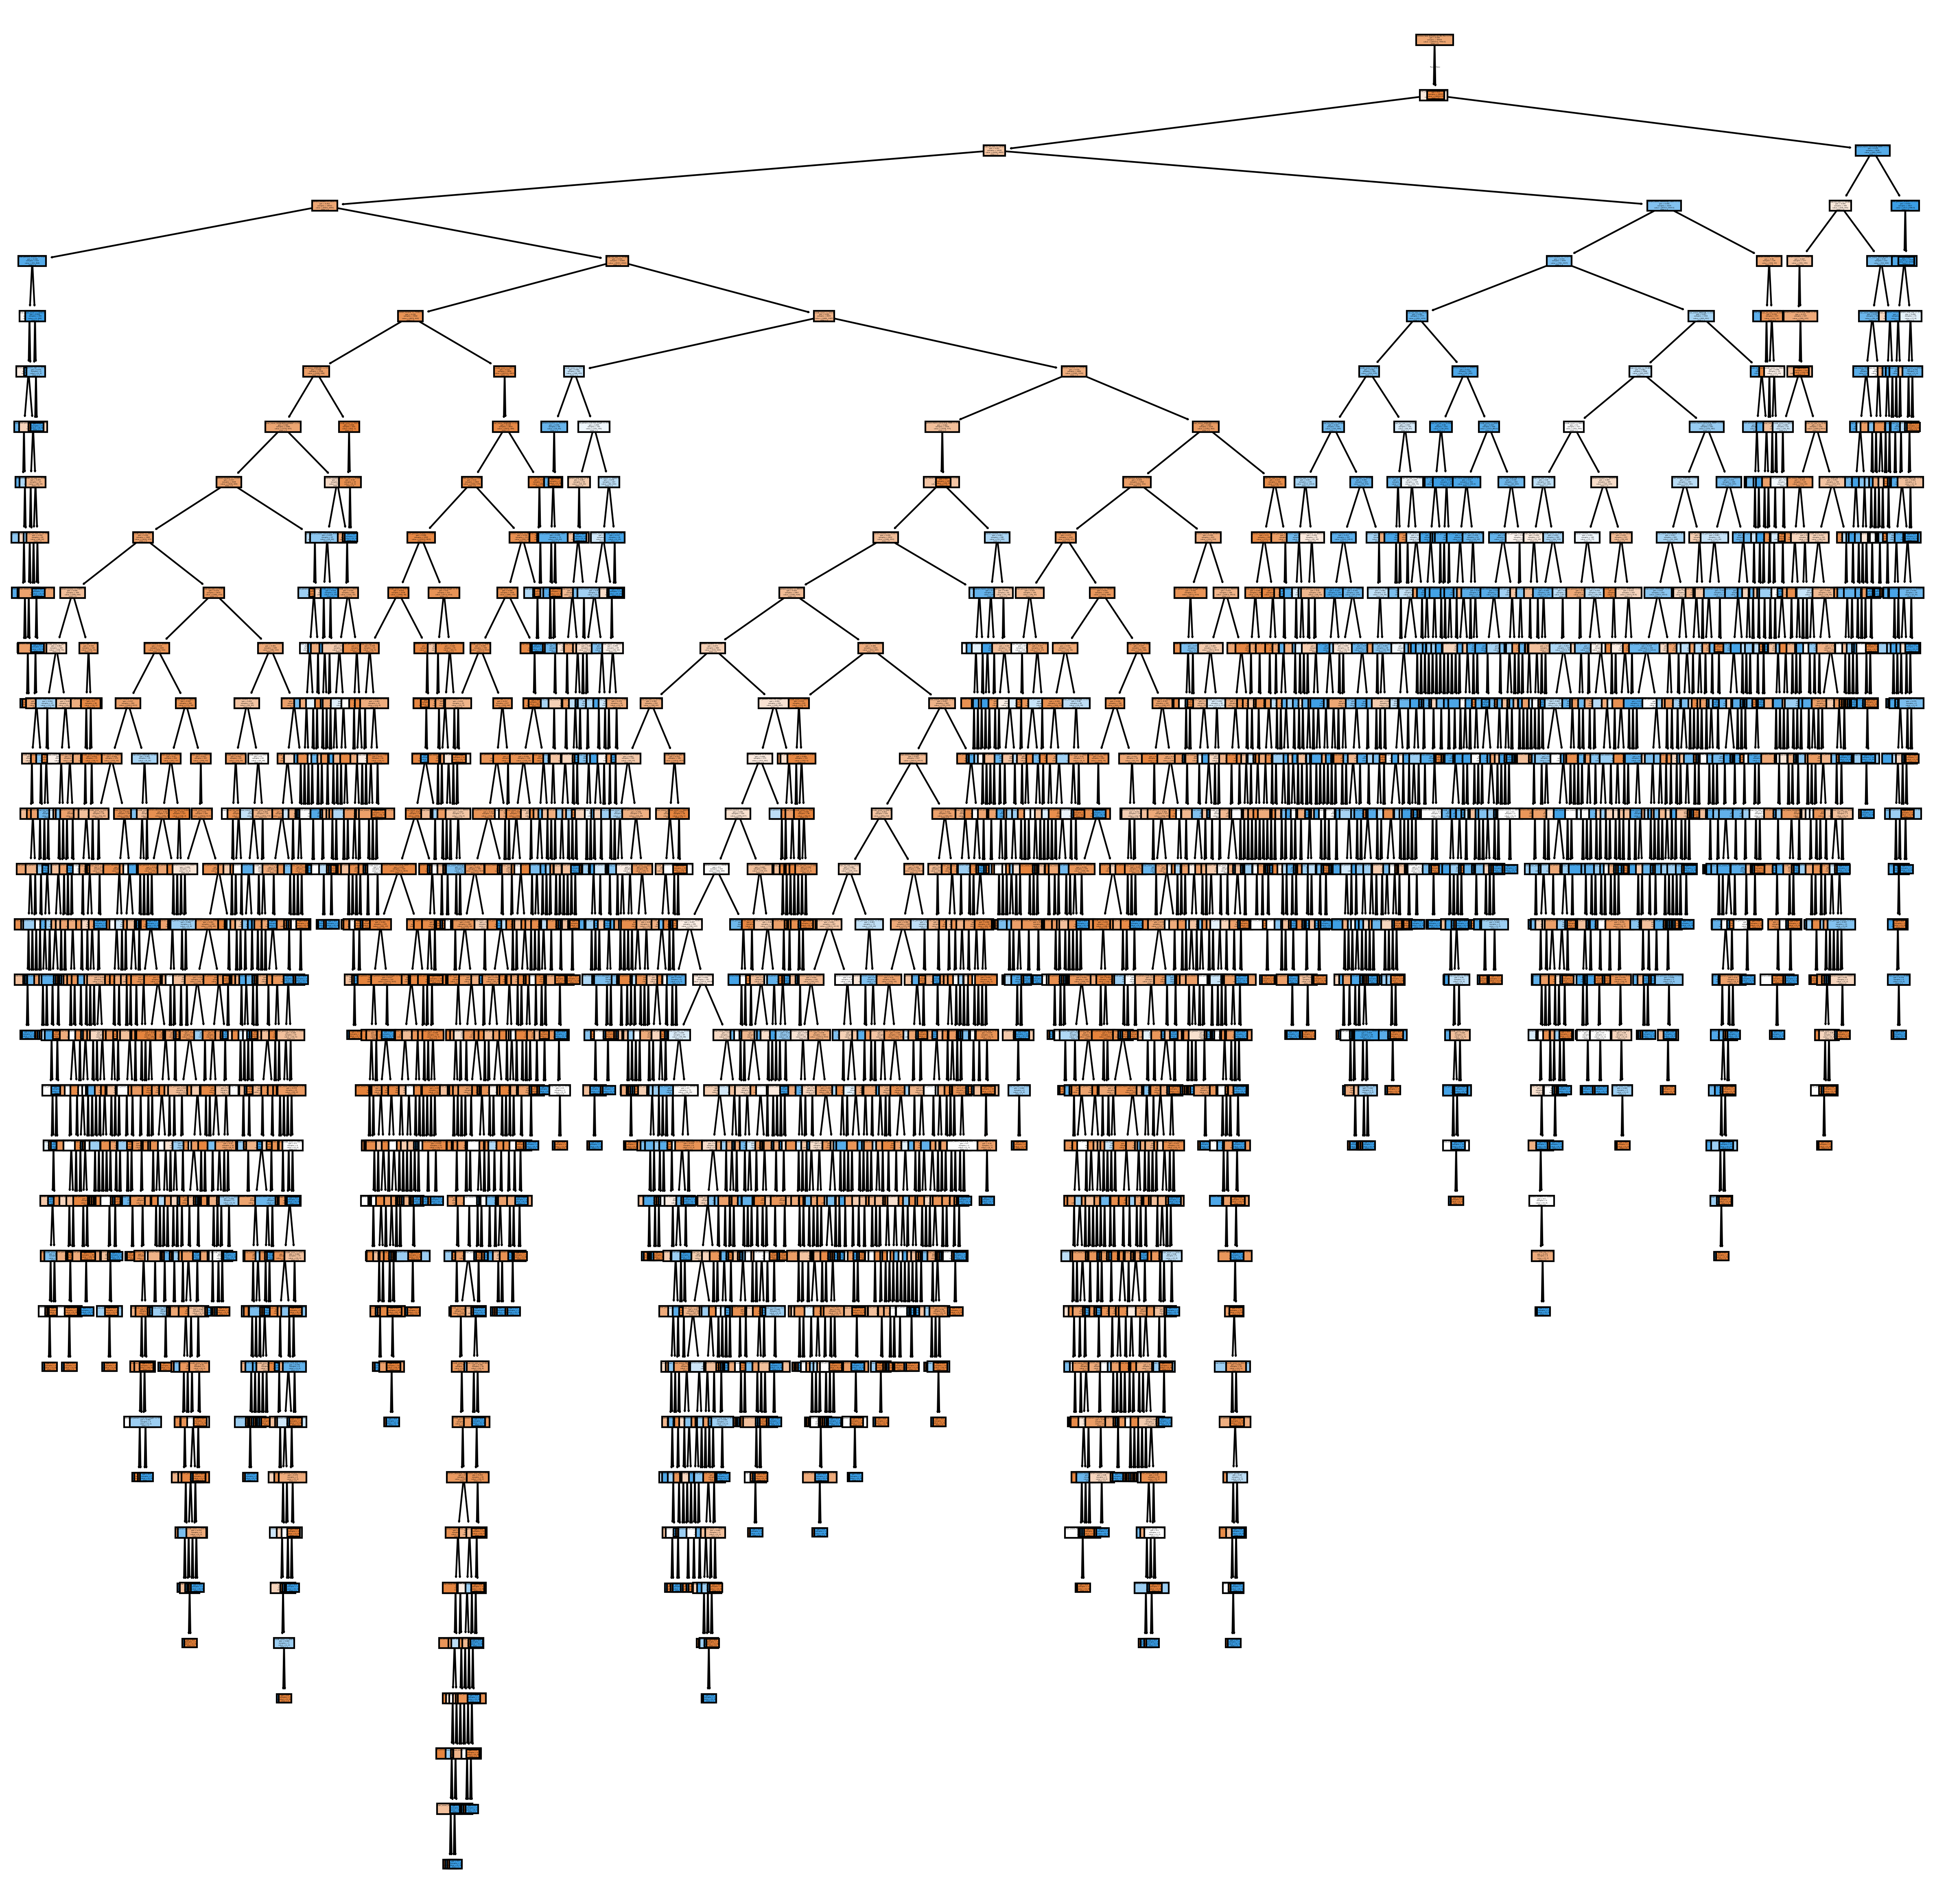

In [6]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20), dpi=300)
plot_tree(model,filled=True,
         feature_names=X_train.columns.tolist(),
         class_names=['0', '1'])
plt.show()

In [7]:
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

estimator = DecisionTreeClassifier(random_state=True)
param_grid = {'criterion':['gini','entropy'],
             'max_depth':list(range(1,16))}
dt_grid = GridSearchCV(estimator, param_grid, scoring='accuracy', cv=5)
dt_grid.fit(X_train,y_train)

#DT with best Hyperparameter
dt=dt_grid.best_estimator_
dt

DecisionTreeClassifier(criterion='entropy', max_depth=11, random_state=True)

In [8]:
dt_grid.best_params_

{'criterion': 'entropy', 'max_depth': 11}

In [9]:
# Important features

feats_ab = pd.DataFrame(data=dt.feature_importances_,
                       index=X.columns,
                       columns=['Importance'])

important_features_dt = feats_ab[feats_ab['Importance']>0].index.tolist()
important_features_dt

['person_age',
 'person_gender',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score',
 'person_education_Bachelor',
 'person_education_Doctorate',
 'person_education_Master',
 'person_home_ownership_OWN',
 'person_home_ownership_RENT',
 'loan_intent_EDUCATION',
 'loan_intent_HOMEIMPROVEMENT',
 'loan_intent_MEDICAL',
 'loan_intent_PERSONAL',
 'loan_intent_VENTURE',
 'previous_loan_defaults_on_file_Yes']

In [10]:
## Creating Decision Tree Model with important parameters and important features

# Selecting train & test data
X_train_dt = X_train[important_features_dt]
X_test_dt = X_test[important_features_dt]

# Modelling
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

model = dt_grid.best_estimator_
model.fit(X_train_dt, y_train)

#Predict train data
ypred_train = model.predict(X_train_dt)
print('Train Accuracy :', accuracy_score(y_train,ypred_train))

print('CV Score : ', cross_val_score(model, X_train,y_train, cv=5, scoring='accuracy').mean())

#Predict & Evaluation on test data
ypred_test = model.predict(X_test_dt)
print('Test Accuracy : ', accuracy_score(y_test, ypred_test))

Train Accuracy : 0.9329722222222222
CV Score :  0.9191666666666667
Test Accuracy :  0.9198888888888889


In [11]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

[[6787  203]
 [ 518 1492]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6990
           1       0.88      0.74      0.81      2010

    accuracy                           0.92      9000
   macro avg       0.90      0.86      0.88      9000
weighted avg       0.92      0.92      0.92      9000



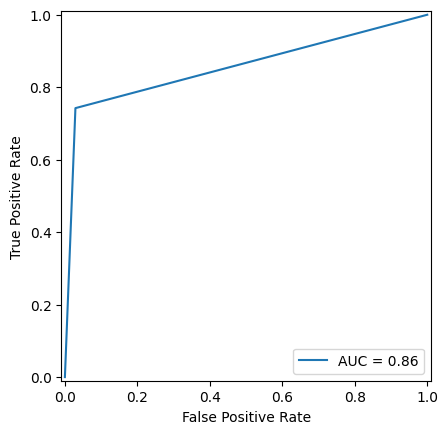

In [12]:
from sklearn.metrics import roc_curve,auc, RocCurveDisplay

fpr,tpr,thresholds = roc_curve(y_test,ypred_test)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.show()

In [13]:
#AUC Score

from sklearn.metrics import roc_auc_score
print('AUC Score : ', roc_auc_score(y_test, ypred_test))

AUC Score :  0.8566235346870796
